In [1]:
import cv2
from PIL import Image, ImageDraw

In [2]:
def show_detect(image_arr, centroids):
    # Draw red circles on the centroids
    image = Image.fromarray(image_arr)
    draw = ImageDraw.Draw(image)

    for i in range(1, num_labels):  # Start from 1 to skip the background
        # Get the centroid for each component
        cx, cy = centroids[i]

        # Draw a red circle at the centroid
        radius = 13  # Circle radius
        draw.rectangle([cx - radius, cy - radius, cx + radius, cy + radius], outline="white", width=2)
    image.show()

In [3]:
image = cv2.imread('img_1.png', cv2.IMREAD_GRAYSCALE)

image_jet = cv2.applyColorMap(image, cv2.COLORMAP_JET)
image_jet = cv2.cvtColor(image_jet, cv2.COLOR_RGB2BGR)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
whitehat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, Kernel)
whitehat_jet = cv2.applyColorMap(whitehat, cv2.COLORMAP_JET)
whitehat_jet = cv2.cvtColor(whitehat_jet, cv2.COLOR_RGB2BGR)

threshold, binary = cv2.threshold(whitehat,100,255,cv2.THRESH_BINARY)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

show_detect(image_jet, centroids)
show_detect(whitehat_jet, centroids)
# show_detect(binary, centroids)


In [4]:
import numpy as np

mean_value = np.mean(whitehat)
max_value = np.max(whitehat)
min_value = np.min(whitehat)
std_value = np.std(whitehat)
median_value = np.median(whitehat)

# Output
print(f"Mean: {mean_value}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Standard Deviation: {std_value}")
print(f"Median: {median_value}")

Mean: 1.8745381191007489
Max: 108
Min: 0
Standard Deviation: 1.5203758454184801
Median: 2.0


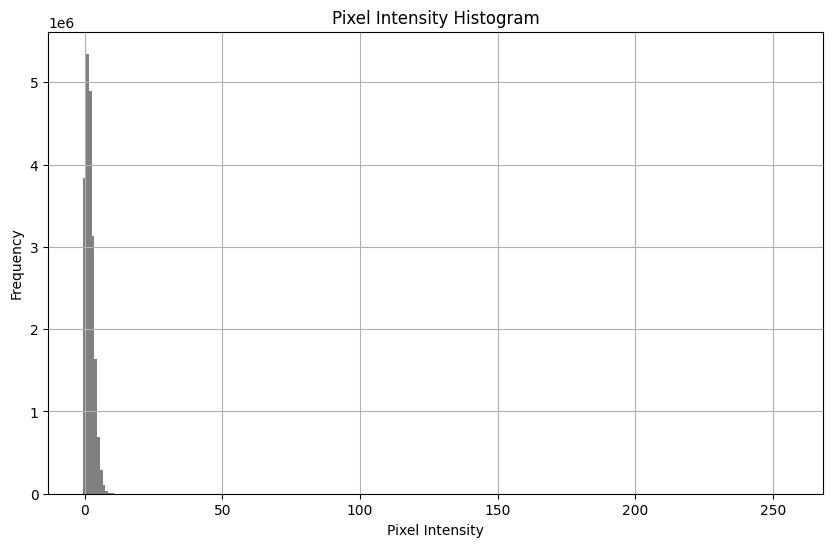

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

histogram = cv2.calcHist([whitehat], [0], None, [256], [0, 256])

# Plot the histogram as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(256), histogram.flatten(), width=1, color='gray')
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()